In [1]:
import os
import subprocess
import pandas as pd

In [2]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data002',
 './data/data001']

In [25]:
cache_ratio = 25
data = data_list[4]

In [29]:
raw_data = {'Cache_Size': [], 'FIFO': [],'LFU':[], 'LRU': [], 'TWO_Q': []}

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['FIFO'].append(float(ratio[1]))
    raw_data['LFU'].append(float(ratio[2]))
    raw_data['LRU'].append(float(ratio[3]))
    raw_data['TWO_Q'].append(float(ratio[4]))


In [30]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,FIFO,LFU,LRU,TWO_Q
Cache_Size,,,,
100,35.4,16.5,36.9,33.0
200,46.2,29.2,48.3,49.2
300,54.4,39.0,57.2,58.2
400,60.7,49.6,64.2,65.3
500,65.5,57.8,69.9,70.9
600,69.5,65.0,74.4,75.2
700,72.7,70.1,78.0,78.6
800,75.5,73.7,81.0,81.4
900,77.9,76.9,83.5,83.6


<AxesSubplot:xlabel='Cache_Size'>

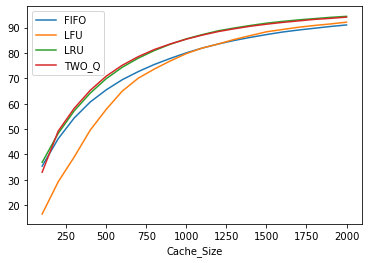

In [31]:
df_hitRatio.plot()